In [ ]:
import pandas as pd
import numpy as np
import os
from gensim import corpora,models,similarities
from sklearn.model_selection import train_test_split

In [ ]:
#os.getcwd()

In [ ]:
dataF = pd.read_excel("original+bt_data.xlsx",names=['Text_id', 'text_data','profane_class'])

In [ ]:
dataF.head(10)

,Text_id,text_data,profane_class
0,0,lmaoooo Lol OK pal what bitch gone tell me...,1
1,1,These whores are loyal.,1
2,2,I came here to ask the same question Their use...,0
3,3,REDIRECT TalkChallenge Chateau Cartier de Gati...,0
4,4,Template English Scottish and British monarchs...,0
5,5,I can't even tell a bitch hey without thinking...,1
6,6,Sep Archive Archive Sep,0
7,7,Notability of Michael Fout A tag has been pla...,0
8,8,The meanest bitch didn't win Queen Fuck the Me...,1
9,9,You're not right for this job. Why good your r...,1


In [ ]:
print("Columns in the original dataset:\n")
print(dataF.columns)


Columns in the original dataset:

Index(['Text_id', 'text_data', 'profane_class'], dtype='object')


Number of rows per star rating:
0    46863
1    46829
Name: profane_class, dtype: int64


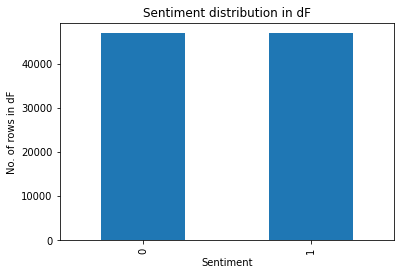

In [ ]:
import matplotlib.pyplot as plt 

print("Number of rows per star rating:")
print(dataF['profane_class'].value_counts())

# Function to map stars to sentiment
def map_sentiment(profane_class):
    if profane_class == 1:
        return 1
    elif profane_class == 0:
        return 0
    else:
        return -1
# Mapping stars to sentiment into three categories
dataF['sentiment'] = [ map_sentiment(x) for x in dataF['profane_class']]
# Plotting the sentiment distribution
plt.figure()
pd.value_counts(dataF['sentiment']).plot.bar(title="Sentiment distribution in dF")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in dF")
plt.show()


In [ ]:
# Removing the stop words
from gensim.parsing.preprocessing import remove_stopwords
print(remove_stopwords("They had a good service!!"))


They good service!!


In [ ]:
from gensim.utils import simple_preprocess
# Tokenize the text column to get the new column 'tokenized_text'
dataF['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in dataF['text_data']] 
print(dataF['tokenized_text'].head(10))


0    [lmaoooo, lol, ok, pal, what, bitch, gone, tel...
1                          [these, whores, are, loyal]
2    [came, here, to, ask, the, same, question, the...
3    [redirect, talkchallenge, chateau, cartier, de...
4    [template, english, scottish, and, british, mo...
5    [can, even, tell, bitch, hey, without, thinkin...
6                         [sep, archive, archive, sep]
7    [notability, of, michael, fout, tag, has, been...
8    [the, meanest, bitch, didn, win, queen, fuck, ...
9    [you, re, not, right, for, this, job, why, goo...
Name: tokenized_text, dtype: object


In [ ]:
from gensim.parsing.porter import PorterStemmer
porter_stemmer = PorterStemmer()
# Get the stemmed_tokens
dataF['stemmed_tokens'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in dataF['tokenized_text'] ]
dataF['stemmed_tokens'].head(10)


0    [lmaoooo, lol, ok, pal, what, bitch, gone, tel...
1                            [these, whore, ar, loyal]
2    [came, here, to, ask, the, same, question, the...
3    [redirect, talkchalleng, chateau, cartier, de,...
4    [templat, english, scottish, and, british, mon...
5    [can, even, tell, bitch, hei, without, think, ...
6                           [sep, archiv, archiv, sep]
7    [notabl, of, michael, fout, tag, ha, been, pla...
8    [the, meanest, bitch, didn, win, queen, fuck, ...
9    [you, re, not, right, for, thi, job, why, good...
Name: stemmed_tokens, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
# Train Test Split Function
def split_train_test(dataF, test_size=0.3, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(dataF[['Text_id','text_data','profane_class','stemmed_tokens']], 
                                                        dataF['sentiment'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size, 
                                                        random_state=15)
    print("Value counts for Train sentiments")
    print(Y_train.value_counts())
    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test

# Call the train_test_split
X_train, X_test, Y_train, Y_test = split_train_test(dataF)


Value counts for Train sentiments
0    32828
1    32756
Name: sentiment, dtype: int64
Value counts for Test sentiments
1    14073
0    14035
Name: sentiment, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
   index  ...                                     stemmed_tokens
0  63212  ...  [hello, keep, get, messag, from, anoth, user, ...
1  26934  ...  [the, power, of, christ, forc, you, to, blow, ...
2  76573  ...  [as, in, natur, biologi, dog, dont, eat, each,...
3   1674  ...  [hello, go, back, to, your, own, countri, you,...
4  45924  ...                            [we, aint, friend, hoe]

[5 rows x 5 columns]


In [ ]:
import torch.nn as nn
import torch.nn.functional as FF
import torch.optim as optim


In [ ]:
import torch
# Use cuda if present
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device available for running: ")
print(device)


Device available for running: 
cpu


In [ ]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        
        # Linear function 1: vocab_size --> 500
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()

        # Linear function 2: 500 --> 500
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.ReLU()

        # Linear function 3 (readout): 500 --> 3
        self.fc3 = nn.Linear(hidden_dim, output_dim)  

    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)

        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu2(out)

        # Linear function 3 (readout)
        out = self.fc3(out)

        return FF.softmax(out, dim=1)


In [ ]:
from gensim import corpora
# Function to return the dictionary either with padding word or without padding
def m_dict(dataF, padding=True):
    if padding:
        print("Dictionary with padded token added")
        print(dataF)
        r_dict = corpora.Dictionary([['pad']])
        r_dict.add_documents(dataF['stemmed_tokens'])
    else:
        print("Dictionary without padding")
        print(dataF)
        r_dict = corpora.Dictionary(dataF['stemmed_tokens'])
    return r_dict
# Make the dictionary without padding for the basic models
r_dict = m_dict(dataF, padding=False)

Dictionary without padding
       Text_id  ...                                     stemmed_tokens
0            0  ...  [lmaoooo, lol, ok, pal, what, bitch, gone, tel...
1            1  ...                          [these, whore, ar, loyal]
2            2  ...  [came, here, to, ask, the, same, question, the...
3            3  ...  [redirect, talkchalleng, chateau, cartier, de,...
4            4  ...  [templat, english, scottish, and, british, mon...
...        ...  ...                                                ...
93687    93687  ...                            [twitter, watch, bitch]
93688    93688  ...  [so, go, and, fuck, yourself, jame, watson, an...
93689    93689  ...  [next, time, add, it, quicker, you, sorri, sac...
93690    93690  ...  [milton, friedman, etc, realli, dont, know, wh...
93691    93691  ...         [bind, tortur, kill, that, my, philosophi]

[93692 rows x 6 columns]


In [ ]:
VOCAB_SIZE = len(r_dict)
NUM_LABELS = 3

# Function to make bow vector to be used as input to network
def make_bow_vector(r_dict, sentence):
    vec = torch.zeros(VOCAB_SIZE, dtype=torch.float64, device=device)
    for word in sentence:
        vec[r_dict.token2id[word]] += 1
    return vec.view(1, -1).float()


In [ ]:
# Function to get the output tensor
def make_target(label):
    if label == -1:
        return torch.tensor([0], dtype=torch.long, device=device)
    elif label == 0:
        return torch.tensor([1], dtype=torch.long, device=device)
    else:
        return torch.tensor([2], dtype=torch.long, device=device)


In [ ]:
VOCAB_SIZE = len(r_dict)

input_dim = VOCAB_SIZE
hidden_dim = 500
output_dim = 3
num_epochs = 100

ff_nn_bow_model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)
ff_nn_bow_model.to(device)

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(ff_nn_bow_model.parameters(), lr=0.001)


In [ ]:
import csv 

In [ ]:
# Open the file for writing loss
ffnn_loss_file_name = 'final.csv'
f = open(ffnn_loss_file_name,'w')
f.write('iter, loss')
f.write('\n')
losses = []
iter = 0
# Start training
for epoch in range(num_epochs):
    #print("1")
    if (epoch+1) % 1 == 0:
  
      #print("2")
      print("Epoch completed: " + str(epoch+1))
    train_loss = 0
    for index, row in X_train.iterrows():
      if index % 1000 == 0:
        # Clearing the accumulated gradients
        optimizer.zero_grad()
        #print(index)
        #print(row)
        # Make the bag of words vector for stemmed tokens 
        bow_vec = make_bow_vector(r_dict, row['stemmed_tokens'])
       
        # Forward pass to get output
        probs = ff_nn_bow_model(bow_vec)

        # Get the target label
        target = make_target(Y_train['sentiment'][index])

        # Calculate Loss: softmax --> cross entropy loss
        loss = loss_function(probs, target)
        # Accumulating the loss over time
        train_loss += loss.item()
        #print("3")
        optimizer.zero_grad()
        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()
       

    with open('final.csv', 'w') as csvfile:
      cwriter = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
      cwriter.writerow(str((epoch+1)) + "," + str(train_loss / len(X_train)))

    

    train_loss = 0

    f.close()


Epoch completed: 1
Epoch completed: 2
Epoch completed: 3
Epoch completed: 4
Epoch completed: 5
Epoch completed: 6
Epoch completed: 7
Epoch completed: 8
Epoch completed: 9
Epoch completed: 10
Epoch completed: 11
Epoch completed: 12
Epoch completed: 13
Epoch completed: 14
Epoch completed: 15
Epoch completed: 16
Epoch completed: 17
Epoch completed: 18
Epoch completed: 19
Epoch completed: 20
Epoch completed: 21
Epoch completed: 22
Epoch completed: 23
Epoch completed: 24
Epoch completed: 25
Epoch completed: 26
Epoch completed: 27
Epoch completed: 28
Epoch completed: 29
Epoch completed: 30
Epoch completed: 31
Epoch completed: 32
Epoch completed: 33
Epoch completed: 34
Epoch completed: 35
Epoch completed: 36
Epoch completed: 37
Epoch completed: 38
Epoch completed: 39
Epoch completed: 40
Epoch completed: 41
Epoch completed: 42
Epoch completed: 43
Epoch completed: 44
Epoch completed: 45
Epoch completed: 46
Epoch completed: 47
Epoch completed: 48
Epoch completed: 49
Epoch completed: 50
Epoch com

In [ ]:
from sklearn.metrics import classification_report
bow_ff_nn_predictions = []
original_lables_ff_bow = []
with torch.no_grad():
    for index, row in X_test.iterrows():
        bow_vec = make_bow_vector(r_dict, row['stemmed_tokens'])
        probs = ff_nn_bow_model(bow_vec)
        bow_ff_nn_predictions.append(torch.argmax(probs, dim=1).cpu().numpy()[0])
        original_lables_ff_bow.append(make_target(Y_test['sentiment'][index]).cpu().numpy()[0])
print(classification_report(original_lables_ff_bow,bow_ff_nn_predictions))
ffnn_loss_df = pd.read_csv(ffnn_loss_file_name)


print(len(ffnn_loss_df))
print(ffnn_loss_df.columns)
#ffnn_plt_500_padding_100_epochs = ffnn_loss_df[' loss'].plot()
#fig = ffnn_plt_500_padding_100_epochs.get_figure()
#fig

              precision    recall  f1-score   support

           1       0.77      0.72      0.75     14035
           2       0.74      0.79      0.76     14073

    accuracy                           0.76     28108
   macro avg       0.76      0.76      0.76     28108
weighted avg       0.76      0.76      0.76     28108

0
Index(['1 0 0 ', ' 0 . 0 0 0 9 2 3 3 8 2 6 8 4 0 9 0 3 9 4'], dtype='object')
